In [1]:
## imports

import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

%matplotlib inline

In [2]:
case1 = 'MAA13'
case2 = 'MAA4002'
year = '2011-2013'


In [3]:
#to do on cal1
# mkdir -p /PLOTS/NACHOS12.L75-${case1}-${case2}/python
# transfer_mean_from_occigen.ksh


In [7]:
def all_plots(case1,case2,year,**kwargs):

  dirmean1='/mnt/alberta/equipes/IGE/meom/workdir/albert/NACHOS12.L75/NACHOS12.L75-'+case1+'-MEAN/1d/'+year+'/'
  dirmean2='/mnt/alberta/equipes/IGE/meom/workdir/albert/NACHOS12.L75/NACHOS12.L75-'+case2+'-MEAN/1d/'+year+'/'

  title="NACHOS12.L75 "+case1+"-"+case2+" "+year
  gridfile='/mnt/alberta/equipes/IGE/meom/workdir/albert/NACHOS12.L75/NACHOS12.L75-I/NACHOS12.L75-MAA4001_mesh_mask.nc'

  file1flxT=dirmean1+'NACHOS12.L75-'+case1+'_y'+year+'.1d_flxT.nc'
  file1T=dirmean1+'NACHOS12.L75-'+case1+'_y'+year+'.1d_gridT.nc'
  file1EKE=dirmean1+'NACHOS12.L75-'+case1+'_y'+year+'.1d_EKE.nc'
  file1MXL03=dirmean1+'NACHOS12.L75-'+case1+'_y'+year+'m03.1d_MXL.nc'
  file1MXL09=dirmean1+'NACHOS12.L75-'+case1+'_y'+year+'m09.1d_MXL.nc'
#  file1ICE03=dirmean1+'NACHOS12.L75-'+case1+'_y'+year+'m03.1d_icemod3.nc'
#  file1ICE09=dirmean1+'NACHOS12.L75-'+case1+'_y'+year+'m09.1d_icemod3.nc'
  file1PSI=dirmean1+'NACHOS12.L75-'+case1+'_y'+year+'.1d_PSI.nc'

  file2flxT=dirmean2+'NACHOS12.L75-'+case2+'_y'+year+'.1d_flxT.nc'
  file2T=dirmean2+'NACHOS12.L75-'+case2+'_y'+year+'.1d_gridT.nc'
  file2EKE=dirmean2+'NACHOS12.L75-'+case2+'_y'+year+'.1d_EKE.nc'
  file2MXL03=dirmean2+'NACHOS12.L75-'+case2+'_y'+year+'m03.1d_MXL.nc'
  file2MXL09=dirmean2+'NACHOS12.L75-'+case2+'_y'+year+'m09.1d_MXL.nc'
#  file2ICE03=dirmean2+'NACHOS12.L75-'+case2+'_y'+year+'m03.1d_icemod3.nc'
#  file2ICE09=dirmean2+'NACHOS12.L75-'+case2+'_y'+year+'m09.1d_icemod3.nc'
  file2PSI=dirmean2+'NACHOS12.L75-'+case2+'_y'+year+'.1d_PSI.nc'

  dsgrid=xr.open_dataset(gridfile)
  lat=dsgrid.nav_lat
  lon=dsgrid.nav_lon
  masksurf=dsgrid.tmaskutil[0]
  mask=dsgrid.tmask[0]

  ds1T=xr.open_dataset(file1T)
  tem1=ds1T.votemper[0]
  sal1=ds1T.vosaline[0]
  ssh1=ds1T.sossheig[0]
  tem1_ma=np.ma.array(tem1,mask=1-mask)
  sal1_ma=np.ma.array(sal1,mask=1-mask)
  ssh1_ma=np.ma.array(ssh1,mask=1-masksurf)

  ds2T=xr.open_dataset(file2T)
  tem2=ds2T.votemper[0]
  sal2=ds2T.vosaline[0]
  ssh2=ds2T.sossheig[0]
  tem2_ma=np.ma.array(tem2,mask=1-mask)
  sal2_ma=np.ma.array(sal2,mask=1-mask)
  ssh2_ma=np.ma.array(ssh2,mask=1-masksurf)

  ds1MXL03=xr.open_dataset(file1MXL03)
  mxl103_rho010=ds1MXL03.somxl010[0]
  mxl103_rho030=ds1MXL03.somxl030[0]
  mxl103_t02=ds1MXL03.somxlt02[0]
  ds1MXL09=xr.open_dataset(file1MXL09)
  mxl109_rho010=ds1MXL09.somxl010[0]
  mxl109_rho030=ds1MXL09.somxl030[0]
  mxl109_t02=ds1MXL09.somxlt02[0]
  mxl103_rho010_ma=np.ma.array(mxl103_rho010,mask=1-masksurf)
  mxl103_rho030_ma=np.ma.array(mxl103_rho030,mask=1-masksurf)
  mxl103_t02_ma=np.ma.array(mxl103_t02,mask=1-masksurf)
  mxl109_rho010_ma=np.ma.array(mxl109_rho010,mask=1-masksurf)
  mxl109_rho030_ma=np.ma.array(mxl109_rho030,mask=1-masksurf)
  mxl109_t02_ma=np.ma.array(mxl109_t02,mask=1-masksurf)

  ds2MXL03=xr.open_dataset(file2MXL03)
  mxl203_rho010=ds2MXL03.somxl010[0]
  mxl203_rho030=ds2MXL03.somxl030[0]
  mxl203_t02=ds2MXL03.somxlt02[0]
  ds2MXL09=xr.open_dataset(file2MXL09)
  mxl209_rho010=ds2MXL09.somxl010[0]
  mxl209_rho030=ds2MXL09.somxl030[0]
  mxl209_t02=ds2MXL09.somxlt02[0]
  mxl203_rho010_ma=np.ma.array(mxl203_rho010,mask=1-masksurf)
  mxl203_rho030_ma=np.ma.array(mxl203_rho030,mask=1-masksurf)
  mxl203_t02_ma=np.ma.array(mxl203_t02,mask=1-masksurf)
  mxl209_rho010_ma=np.ma.array(mxl209_rho010,mask=1-masksurf)
  mxl209_rho030_ma=np.ma.array(mxl209_rho030,mask=1-masksurf)
  mxl209_t02_ma=np.ma.array(mxl209_t02,mask=1-masksurf)

  ds1EKE=xr.open_dataset(file1EKE)
  eke1=ds1EKE.voeke[0,0]
  eke1_ma=np.ma.array(eke1,mask=1-masksurf)

  ds2EKE=xr.open_dataset(file2EKE)
  eke2=ds2EKE.voeke[0,0]
  eke2_ma=np.ma.array(eke2,mask=1-masksurf)

  ds1PSI=xr.open_dataset(file1PSI)
  psi1=ds1PSI.sobarstf[0]
  psi1_ma=np.ma.array(psi1,mask=1-masksurf)

  ds2PSI=xr.open_dataset(file2PSI)
  psi2=ds2PSI.sobarstf[0]
  psi2_ma=np.ma.array(psi2,mask=1-masksurf)

  ds1flxT=xr.open_dataset(file1flxT)
  Heat1=ds1flxT.sohefldo[0]
  WaterFlx1=ds1flxT.sowaflup[0]
  WaterDmp1=ds1flxT.sowafld[0]
  Heat1_ma=np.ma.array(Heat1,mask=1-masksurf)
  WaterFlx1_ma=np.ma.array(WaterFlx1,mask=1-masksurf)
  WaterDmp1_ma=np.ma.array(WaterDmp1,mask=1-masksurf)
  ds2flxT=xr.open_dataset(file2flxT)
  Heat2=ds2flxT.sohefldo[0]
  WaterFlx2=ds2flxT.sowaflup[0]
  WaterDmp2=ds2flxT.sowafld[0]
  Heat2_ma=np.ma.array(Heat2,mask=1-masksurf)
  WaterFlx2_ma=np.ma.array(WaterFlx2,mask=1-masksurf)
  WaterDmp2_ma=np.ma.array(WaterDmp2,mask=1-masksurf)

#  ds1ICE03=xr.open_dataset(file1ICE03)
#  iconc103=ds1ICE03.siconc[0]
#  ivolu103=ds1ICE03.sivolu[0]
#  ds1ICE09=xr.open_dataset(file1ICE09)
#  iconc109=ds1ICE09.siconc[0]
#  ivolu109=ds1ICE09.sivolu[0]

#  ds2ICE03=xr.open_dataset(file2ICE03)
#  iconc203=ds2ICE03.siconc[0]
#  ivolu203=ds2ICE03.sivolu[0]
#  ds2ICE09=xr.open_dataset(file2ICE09)
#  iconc209=ds2ICE09.siconc[0]
#  ivolu209=ds2ICE09.sivolu[0]


  def plot_glob(fig,sub,var,vmin,vmax,unit,name,pal):
    ax = fig.add_subplot(sub,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
    cmap = plt.get_cmap(pal)
    cmap.set_under(color='grey')
    pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
    ax.set_global()
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines()
    cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1)
    cbar.ax.tick_params(labelsize=20)
    ax.set_title(name+' '+unit,size=17)

  def plot_glob_diff(fig,sub,var1,var2,vmin,vmax,unit,name,pal):
    ax = fig.add_subplot(sub,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
    cmap = plt.get_cmap(pal)
    cmap.set_under(color='grey')
    pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var1-var2),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
    ax.set_global()
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines()
    cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1)
    cbar.ax.tick_params(labelsize=20)
    ax.set_title(name+' '+unit,size=17)

  def plot_atl(fig,sub,var,vmin,vmax,unit,name,pal):
    ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
    cmap = plt.get_cmap(pal)
    ax.set_extent([-100, 50, 0, 70])
    cmap.set_under(color='grey')
    pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

    fig.subplots_adjust(right=0.8)
    ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
    ax.text(0.5, -0.2, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75)
    ax.set_title(name+' '+unit,size=17,y=1.08)

  def plot_atl_cont(fig,sub,var,unit,name,vmin,vmax,pal):
    ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
    ax.set_extent([-100, 50, 0, 70])
    cmap = plt.get_cmap(pal)
    cmap.set_under(color='grey')
    pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
    pcont=ax.contour(lon,lat,ma.masked_invalid(var),10,colors='k',transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND,facecolor='black')
    ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='grey', alpha=0.5, linestyle='--')

    fig.subplots_adjust(right=0.8)
    ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
    ax.text(0.5, -0.2, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75)

    ax.set_title(name+' '+unit,size=17,y=1.08)

  def plot_natl(fig,sub,var,vmin,vmax,unit,name,pal):
    ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
    ax.set_extent([-100, 50, 50, 70])
    cmap = plt.get_cmap(pal)
    cmap.set_under(color='grey')
    pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

    fig.subplots_adjust(right=0.8)
    ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
    ax.text(0.5, -0.4, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75)
    ax.set_title(name+' '+unit,size=17,y=1.19)



# Tous les plots

# Tous les plots glob

# Eke, SSH,T et S

  fig = plt.figure(figsize=(22,7))
  plot_glob(fig,131,10000*eke1_ma,0,2500,'',case1,cmocean.cm.amp)
  plot_glob(fig,132,10000*eke2_ma,0,2500,'',case2,cmocean.cm.amp)
  plot_glob(fig,133,10000*eke1_ma-10000*eke2_ma,-2500,2500,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Surf EKE 1e4m2s '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_ekesurf_glob.png')
  fig = plt.figure(figsize=(22,7))
  plot_glob(fig,131,tem1_ma[0],-2,30,'',case1,cmocean.cm.thermal)
  plot_glob(fig,132,tem2_ma[0],-2,30,'',case2,cmocean.cm.thermal)
  plot_glob(fig,133,tem1_ma[0]-tem2_ma[0],-2,2,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Surf Temperature deg C '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_tsurf_glob.png')
  fig = plt.figure(figsize=(22,7))
  plot_glob(fig,131,sal1_ma[0],30,40,'',case1,cmocean.cm.haline)
  plot_glob(fig,132,sal2_ma[0],30,40,'',case2,cmocean.cm.haline)
  plot_glob(fig,133,sal1_ma[0]-sal2_ma[0],-1,1,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Surf Salinity PSU '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_ssurf_glob.png')

#MXL 
  fig = plt.figure(figsize=(22,7))
  plot_glob(fig,131,mxl103_rho010_ma,0,1500,'',case1,cmocean.cm.tempo)
  plot_glob(fig,132,mxl203_rho010_ma,0,1500,'',case2,cmocean.cm.tempo)
  plot_glob(fig,133,mxl103_rho010_ma-mxl203_rho010_ma,-100,100,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 March MXL rho010 m '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_mxl03_glob.png')
  fig = plt.figure(figsize=(22,7))
  plot_glob(fig,131,mxl109_rho010_ma,0,200,'',case1,cmocean.cm.tempo)
  plot_glob(fig,132,mxl209_rho010_ma,0,200,'',case2,cmocean.cm.tempo)
  plot_glob(fig,133,mxl109_rho010_ma-mxl209_rho010_ma,-50,50,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Sept MXL rho010 m '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_mxl09_glob.png')

#flx 
  fig = plt.figure(figsize=(22,7))
  plot_glob(fig,131,Heat1_ma,-400,400,'',case1,cmocean.cm.solar)
  plot_glob(fig,132,Heat2_ma,-400,400,'',case2,cmocean.cm.solar)
  plot_glob(fig,133,Heat1_ma-Heat2_ma,-100,100,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Net Heat Flux '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_heat_flx_glob.png')
  fig = plt.figure(figsize=(22,7))
  plot_glob(fig,131,86400*WaterFlx1_ma,-9,7,'',case1,cmocean.cm.balance)
  plot_glob(fig,132,86400*WaterFlx2_ma,-9,7,'',case2,cmocean.cm.balance)
  plot_glob(fig,133,86400*WaterFlx1_ma-86400*WaterFlx2_ma,-2,2,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Water Flux '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_water_flx_glob.png')
  fig = plt.figure(figsize=(22,7))
  plot_glob(fig,131,86400*WaterDmp1_ma,-7,7,'',case1,cmocean.cm.balance)
  plot_glob(fig,132,86400*WaterDmp2_ma,-7,7,'',case2,cmocean.cm.balance)
  plot_glob(fig,133,86400*WaterDmp1_ma-86400*WaterDmp2_ma,-2,2,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Water Damping '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_water_dmp_glob.png')

# Tous les plots Atlantique

# T & S

  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,131,tem1_ma[0],-2,30,'',case1,cmocean.cm.thermal)
  plot_atl(fig,132,tem2_ma[0],-2,30,'',case2,cmocean.cm.thermal)
  plot_atl(fig,133,tem1_ma[0]-tem2_ma[0],-2,2,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Surf Temperature deg C '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_tsurf_atl.png')
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,131,sal1_ma[0],30,40,'',case1,cmocean.cm.haline)
  plot_atl(fig,132,sal2_ma[0],30,40,'',case2,cmocean.cm.haline)
  plot_atl(fig,133,sal1_ma[0]-sal2_ma[0],-1,1,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Surf Salinity PSU '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_ssurf_atl.png')
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,131,tem1_ma[30],-2,30,'',case1,cmocean.cm.thermal)
  plot_atl(fig,132,tem2_ma[30],-2,30,'',case2,cmocean.cm.thermal)
  plot_atl(fig,133,tem1_ma[30]-tem2_ma[30],-2,2,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 200m Temperature deg C '+year, fontsize=25)  
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_t200m_atl.png')
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,131,sal1_ma[30],30,40,'',case1,cmocean.cm.haline)
  plot_atl(fig,132,sal2_ma[30],30,40,'',case2,cmocean.cm.haline)
  plot_atl(fig,133,sal1_ma[30]-sal2_ma[30],-2,2,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 200m Salinity PSU '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_s200m_atl.png')
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,131,tem1_ma[46],-2,30,'',case1,cmocean.cm.thermal)
  plot_atl(fig,132,tem2_ma[46],-2,30,'',case2,cmocean.cm.thermal)
  plot_atl(fig,133,tem1_ma[46]-tem2_ma[46],-2,2,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 1000m Temperature deg C '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_t1000m_atl.png')
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,131,sal1_ma[46],30,40,'',case1,cmocean.cm.haline)
  plot_atl(fig,132,sal2_ma[46],30,40,'',case2,cmocean.cm.haline)
  plot_atl(fig,133,sal1_ma[46]-sal2_ma[46],-1,1,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 1000m Salinity PSU '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_s1000m_atl.png')

#PSI  
  fig = plt.figure(figsize=(22,7))
  plot_atl_cont(fig,131,1e-7*psi1_ma,'',case1,-4,4,'Blues')
  plot_atl_cont(fig,132,1e-7*psi2_ma,'',case2,-4,4,'Blues')
  plot_atl_cont(fig,133,1e-7*psi1_ma-1e-7*psi2_ma,'',case1+'-'+case2,-1,1,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Stream function '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_psi_atl.png')

#flx  
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,131,Heat1_ma,-400,400,'',case1,cmocean.cm.solar)
  plot_atl(fig,132,Heat2_ma,-400,400,'',case2,cmocean.cm.solar)
  plot_atl(fig,133,Heat1_ma-Heat2_ma,-100,100,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Net Heat Flux '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_heat_flx_atl.png')
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,131,86400*WaterFlx1_ma,-9,7,'',case1,cmocean.cm.balance)
  plot_atl(fig,132,86400*WaterFlx2_ma,-9,7,'',case2,cmocean.cm.balance)
  plot_atl(fig,133,86400*WaterFlx1_ma-86400*WaterFlx2_ma,-2,2,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Water Flux '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_water_flx_atl.png')
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,131,86400*WaterDmp1_ma,-7,7,'',case1,cmocean.cm.balance)
  plot_atl(fig,132,86400*WaterDmp2_ma,-7,7,'',case2,cmocean.cm.balance)
  plot_atl(fig,133,86400*WaterDmp1_ma-86400*WaterDmp2_ma,-2,2,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Water Damping '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_water_dmp_atl.png')

#MXL
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,131,mxl103_rho010_ma,0,1500,'',case1,cmocean.cm.tempo)
  plot_atl(fig,132,mxl203_rho010_ma,0,1500,'',case2,cmocean.cm.tempo)
  plot_atl(fig,133,mxl103_rho010_ma-mxl203_rho010_ma,-100,100,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 March MXL rho010 m '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_mxl03_atl.png')
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,131,mxl109_rho010_ma,0,200,'',case1,cmocean.cm.tempo)
  plot_atl(fig,132,mxl209_rho010_ma,0,200,'',case2,cmocean.cm.tempo)
  plot_atl(fig,133,mxl109_rho010_ma-mxl209_rho010_ma,-50,50,'',case1+'-'+case2,cmocean.cm.balance)
  fig.suptitle('NACHOS12.L75 Sept MXL rho010 m '+year, fontsize=25)
  plt.savefig('NACHOS12.L75_MAA13-MAA4002_mxl09_atl.png')



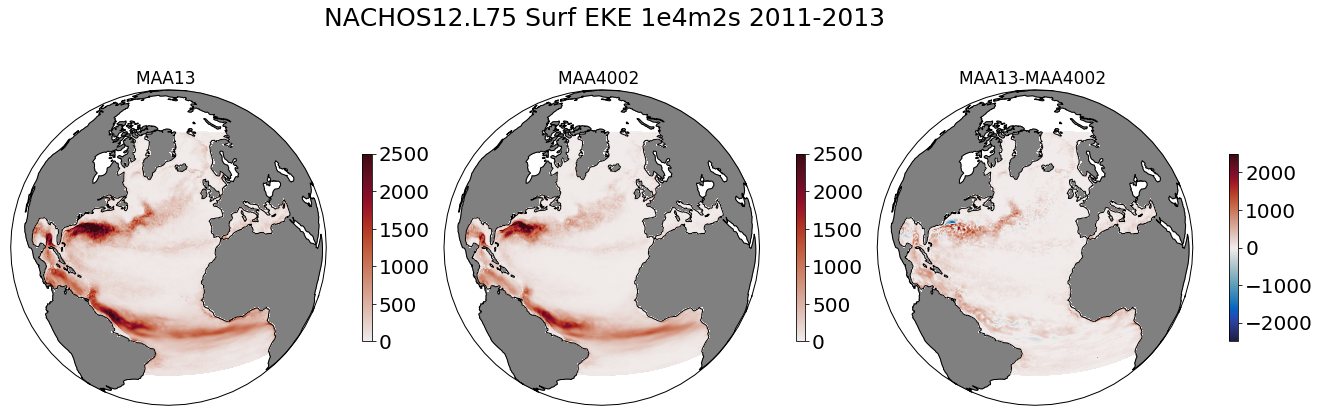

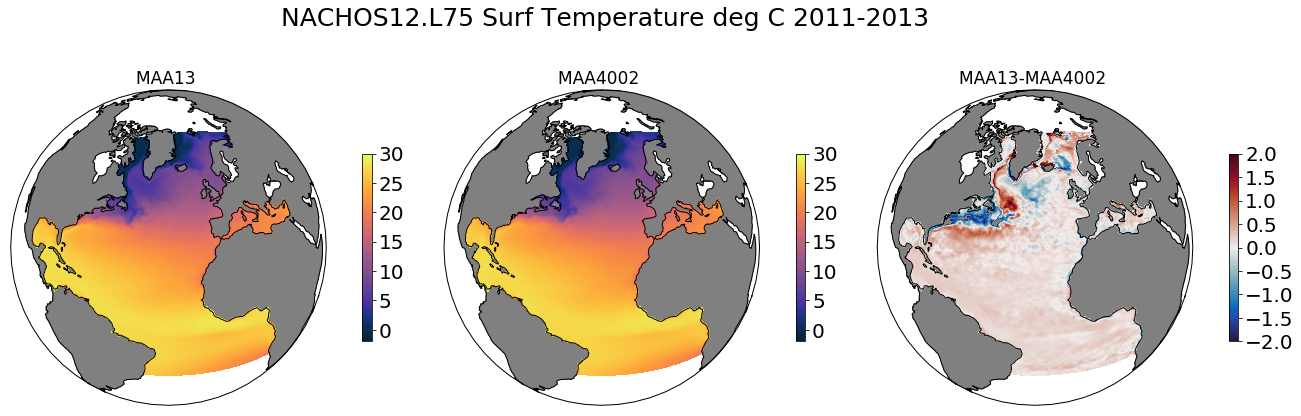

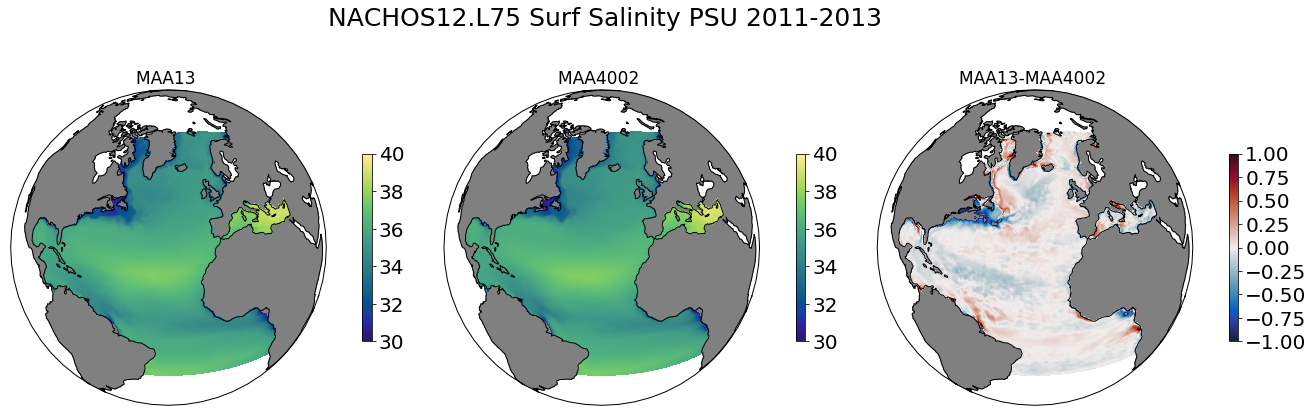

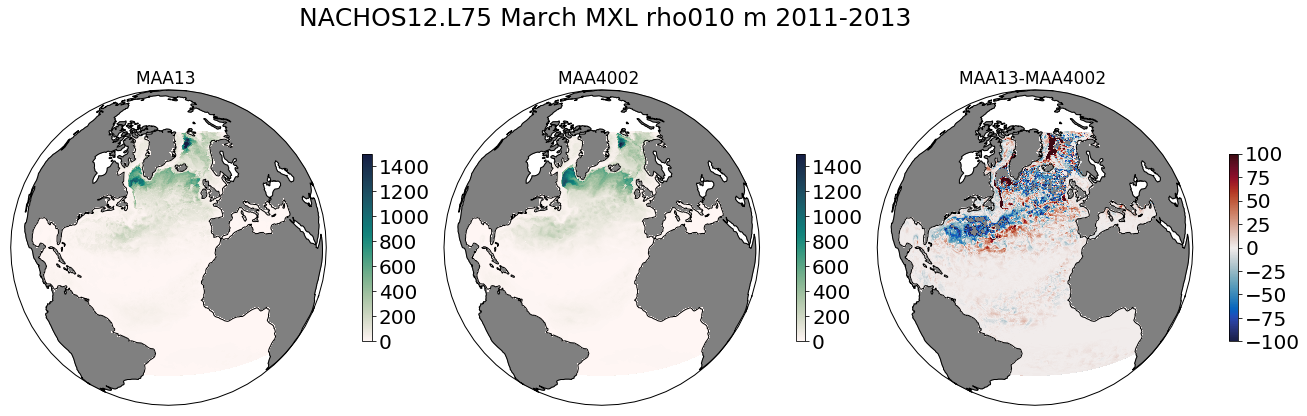

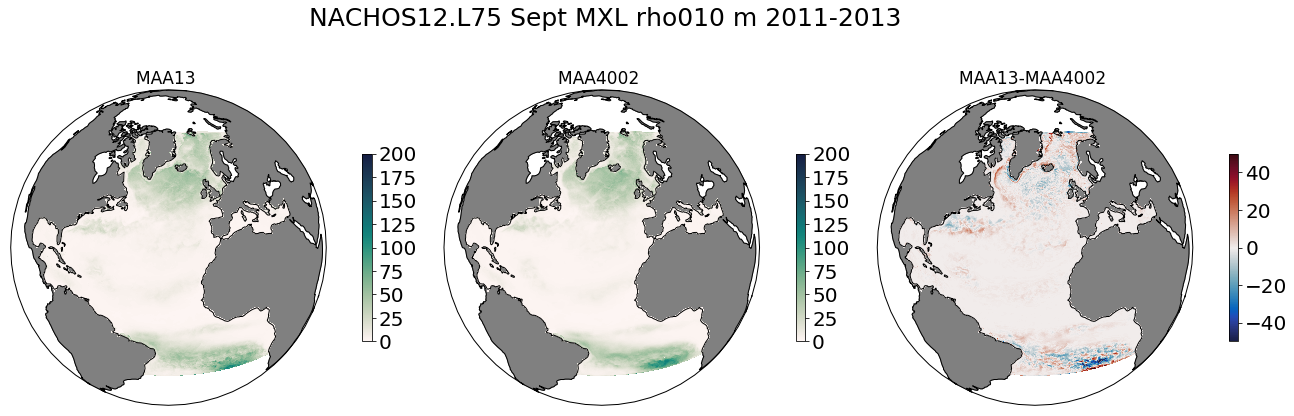

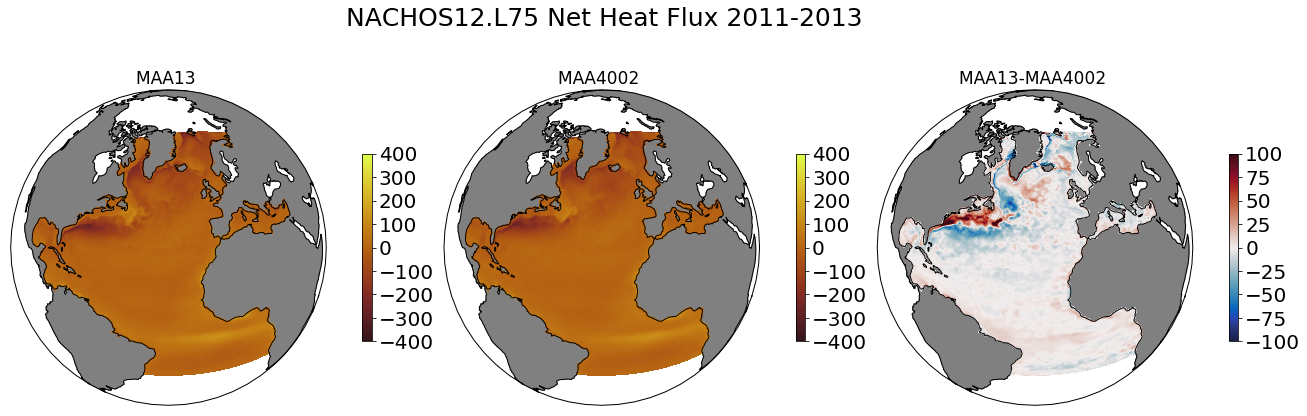

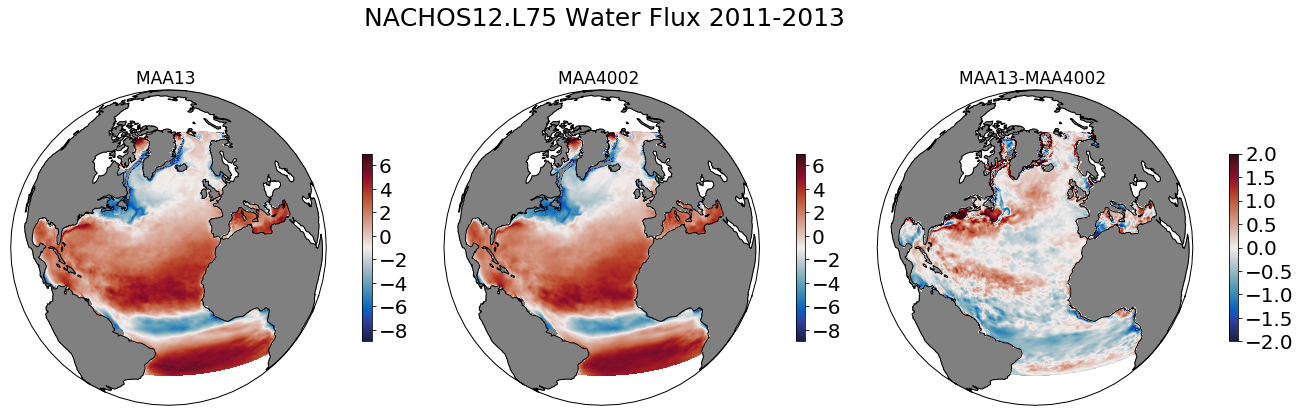

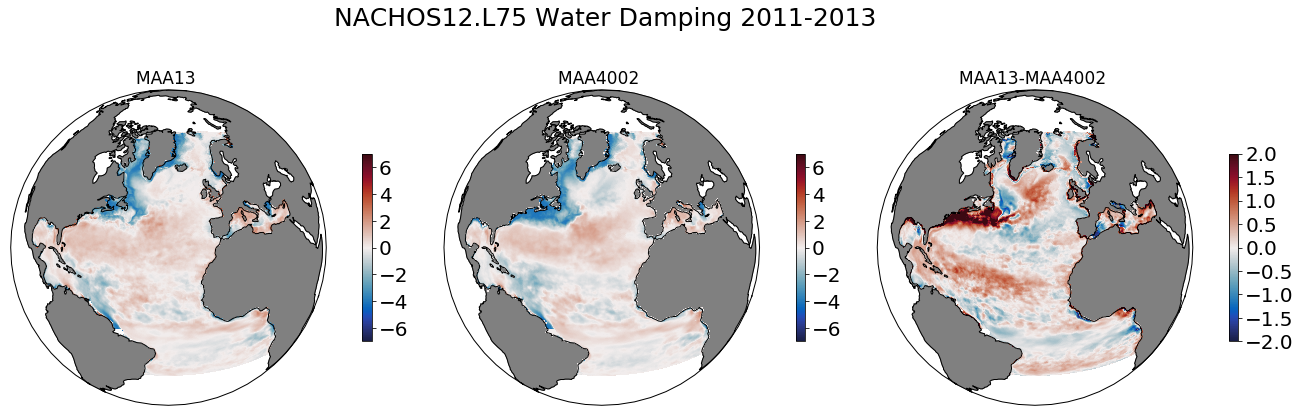

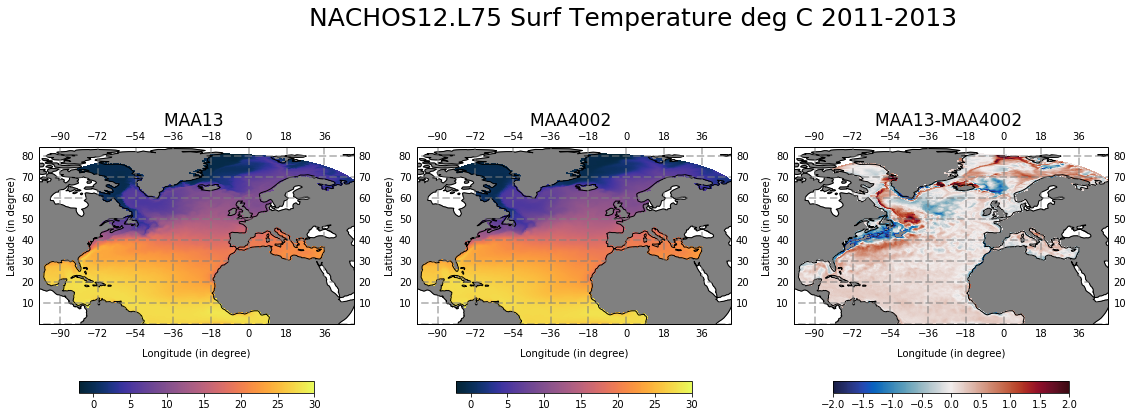

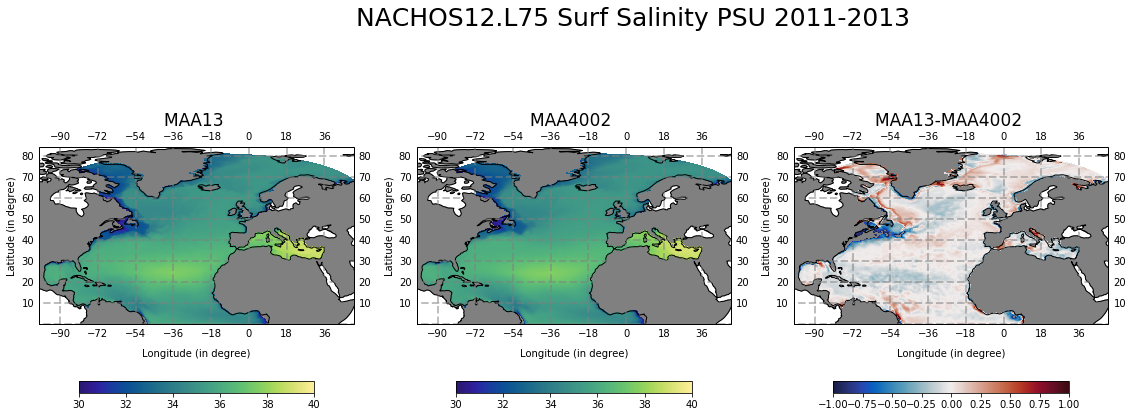

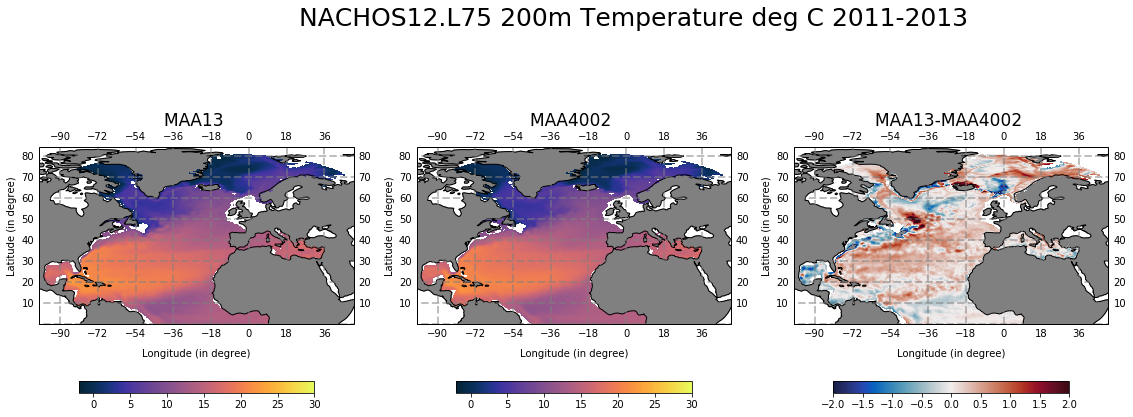

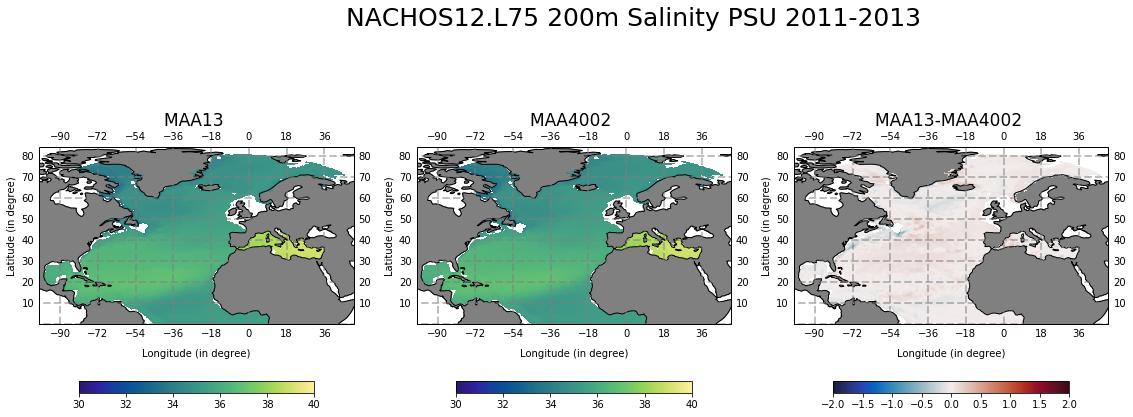

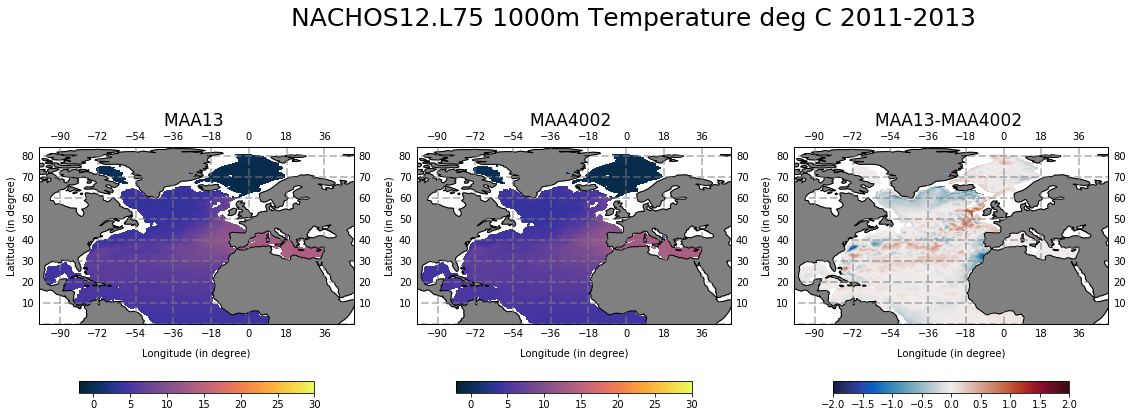

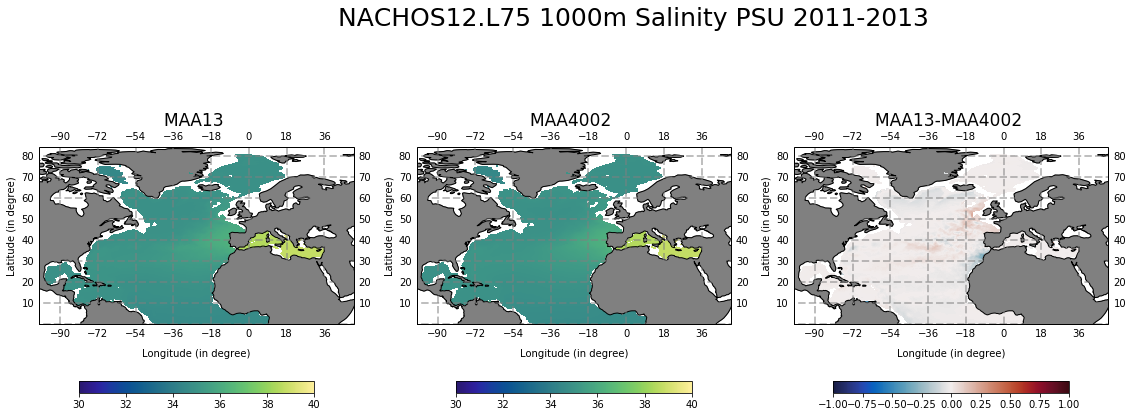

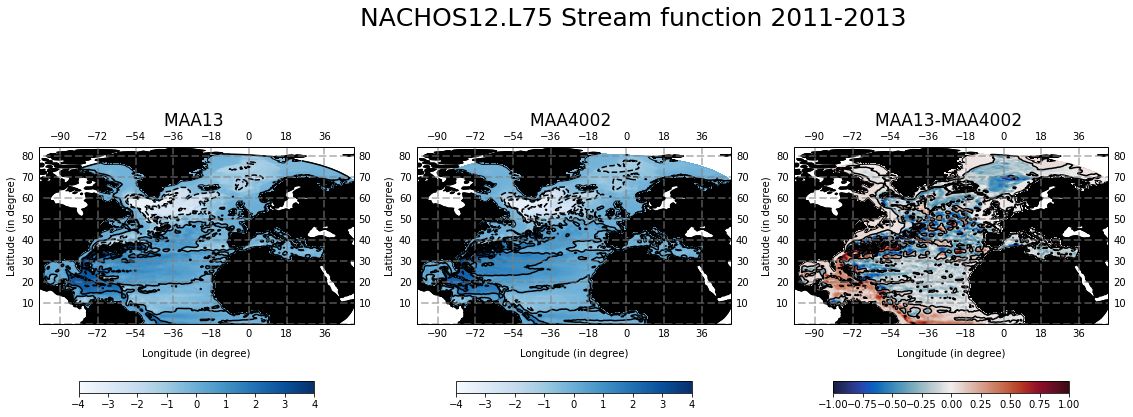

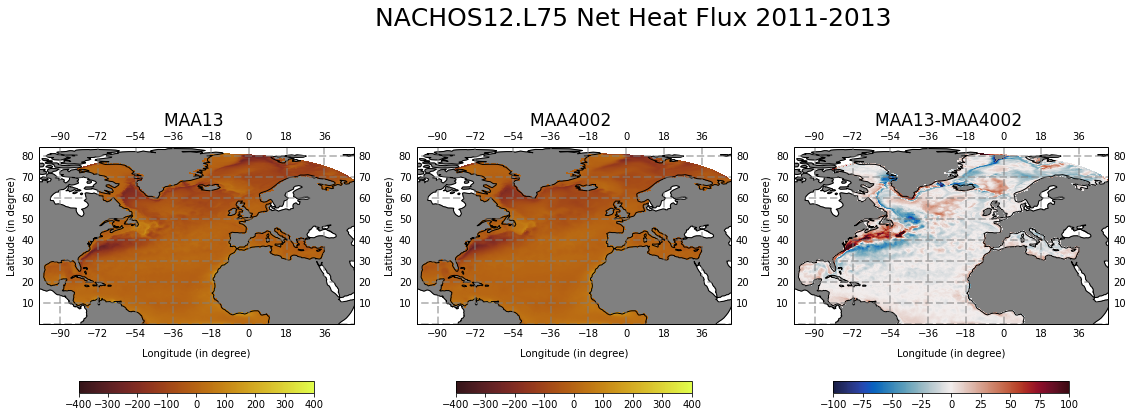

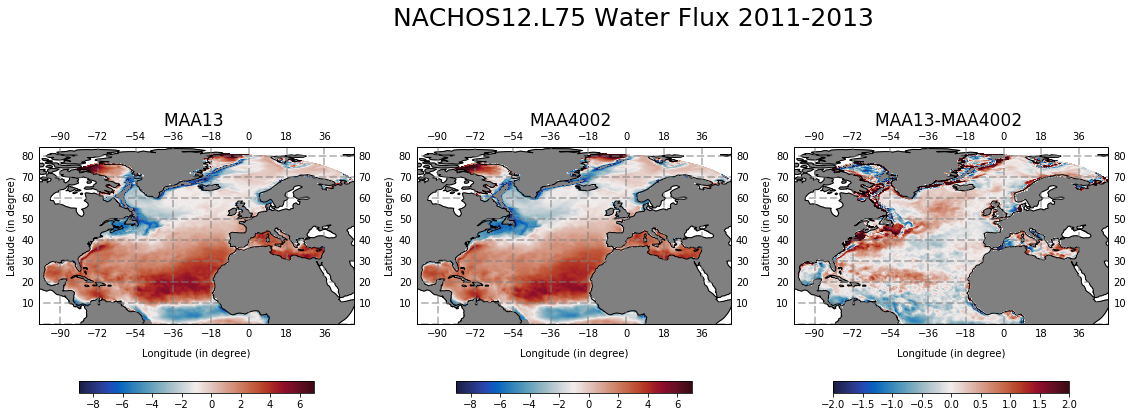

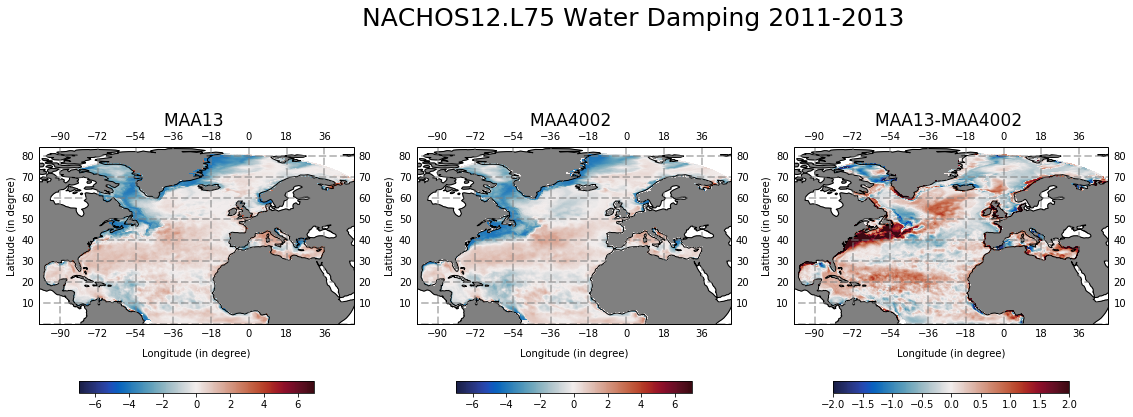

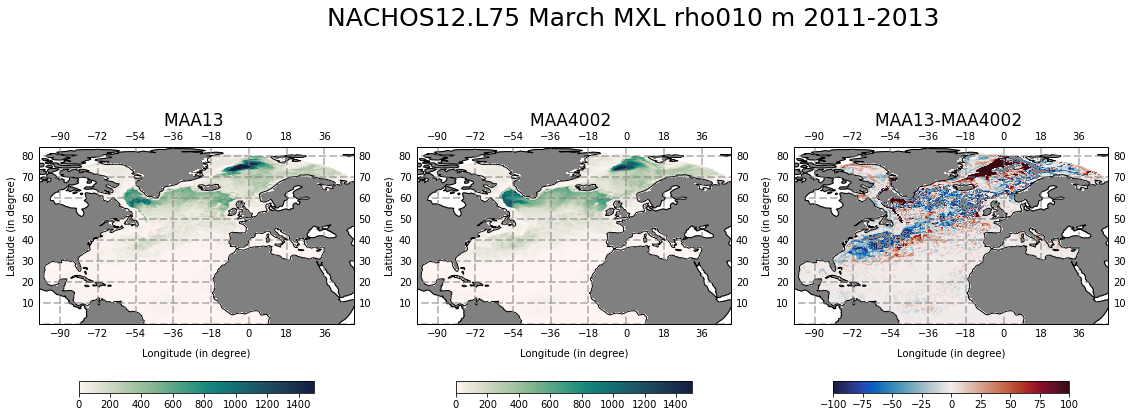

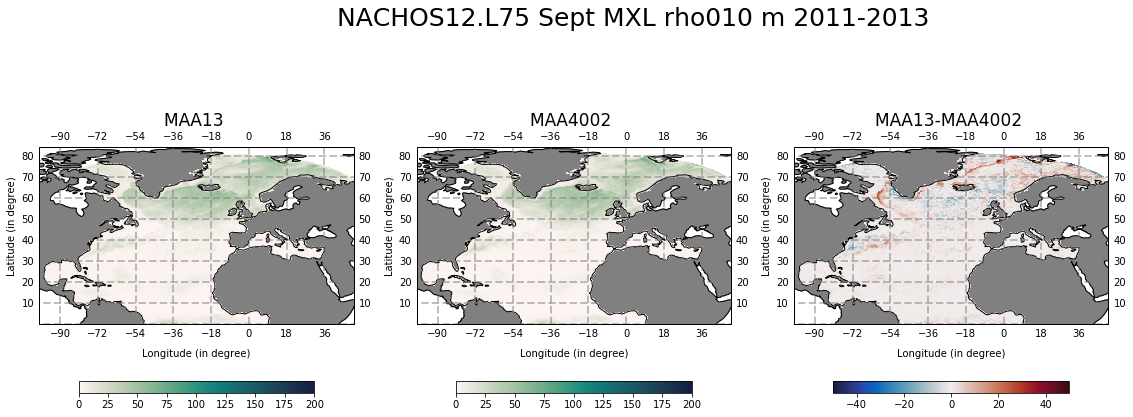

In [8]:
all_plots(case1,case2,year)
